<center>
<a href="http://uf-mi.u-bordeaux.fr/MSS/" ><img src="https://www.math.u-bordeaux.fr/~jbigot/Site/Enseignement_files/logo_MAS_MSS.jpg" style="float:left; max-width: 400px; display: inline" alt="INSA"/></a> 

<a href="https://www.math.u-bordeaux.fr/" ><img src="https://www.math.u-bordeaux.fr/~jbigot/Site/Enseignement_files/LogoIMB.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

<center>
<big><span style="color:red">
Codes Python pour le Défi IA 2023 : 1001 nights ! 
</span></big>
    </center>
    
   <center>
<big>Par Ima BERNADA & Ambre ROBERT</big>
    </center>

Ce notebook Jupyter contient la première partie des codes python que nous avons mis en place pour notre travail dans le cadre du défi IA 2023. 

Pour voir **toutes les sorties de code affichées** sélectionner le fichier au format html.

# Importation des librairies 

In [1]:
import numpy as np
from numpy import arange
import math

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import folium
from geopy.geocoders import Nominatim

# Chargement des jeux de données 

In [2]:
# nos données extraites 
train = pd.read_csv('all_data.csv')  # toutes les données extraites
train1 = pd.read_csv('best_data.csv') # données qui ont de meilleurs résultats 

# données sur les hôtels
hotel_features = pd.read_csv('features_hotels.csv',index_col=['hotel_id', 'city'])

# concatener les jeux de données
df_train1 = pd.DataFrame()
df_train = pd.DataFrame()
df_train1 = pd.concat([df_train1, train], axis=0) # toutes les données extraites
df_train = pd.concat([df_train, train1], axis=0) # données qui ont de meilleurs résultats 

# données sur lesquelles on s'appuie pour les soumissions
df_pred = pd.read_csv('test_set.csv')

# jeux de données joint avec hotel_features
df_train = df_train.join(hotel_features, on=['hotel_id', 'city'])
df_train1 = df_train1.join(hotel_features, on=['hotel_id', 'city'])
df_pred = df_pred.join(hotel_features, on=['hotel_id', 'city'])

**Le jeu de données complet :**

In [3]:
display(df_train1)

,Unnamed: 0,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,0,283,98,104,amsterdam,43,austrian,0,59750,Independant,Independant,1,0,0
1,1,387,241,264,amsterdam,43,austrian,0,59750,Accar Hotels,Safitel,1,0,0
2,2,806,237,261,amsterdam,43,austrian,0,59750,Chillton Worldwide,Chill Garden Inn,0,0,1
3,3,465,237,264,amsterdam,43,austrian,0,59750,Morriott International,Corlton,1,1,0
4,4,724,235,263,amsterdam,43,austrian,0,59750,Morriott International,Corlton,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977519,82,502,102,13,vilnius,16,swedish,1,325723,Boss Western,Boss Western,0,0,0
977520,83,593,59,24,vilnius,16,swedish,1,325723,Independant,Independant,0,0,0
977521,84,294,62,3,vilnius,16,swedish,1,325723,Independant,Independant,1,0,0
977522,85,355,87,10,vilnius,16,swedish,1,325723,Independant,Independant,1,0,0


**Jeu de données df_train ne comprenant que nos dernières requètes car permet d'obtenir de meilleurs résultats :**

In [4]:
display(df_train)

,Unnamed: 0,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,0,591,332,9,amsterdam,5,austrian,0,199603,Accar Hotels,Safitel,0,0,0
1,1,256,82,0,amsterdam,5,austrian,0,199603,Accar Hotels,Ibas,1,0,0
2,2,111,154,4,amsterdam,5,austrian,0,199603,Boss Western,Boss Western,1,0,0
3,3,867,156,0,amsterdam,5,austrian,0,199603,Independant,Independant,1,0,0
4,4,12,83,0,amsterdam,5,austrian,0,199603,Independant,Independant,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612182,82,502,102,13,vilnius,16,swedish,1,325723,Boss Western,Boss Western,0,0,0
612183,83,593,59,24,vilnius,16,swedish,1,325723,Independant,Independant,0,0,0
612184,84,294,62,3,vilnius,16,swedish,1,325723,Independant,Independant,1,0,0
612185,85,355,87,10,vilnius,16,swedish,1,325723,Independant,Independant,1,0,0


Notre jeu de données complet compte 977524 lignes et 14 colones (avant transformation). Le jeu de données dont nous allons nous servir dans la suite contient quant à lui 612187 lignes et 14 colones (avant transformation).

# I) Analyse descriptive

## A- Statistiques descriptives sur le jeu de données test

In [5]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6644 entries, 0 to 6643
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            6644 non-null   int64 
 1   order_requests   6644 non-null   int64 
 2   city             6644 non-null   object
 3   date             6644 non-null   int64 
 4   language         6644 non-null   object
 5   mobile           6644 non-null   int64 
 6   avatar_id        6644 non-null   int64 
 7   hotel_id         6644 non-null   int64 
 8   stock            6644 non-null   int64 
 9   group            6644 non-null   object
 10  brand            6644 non-null   object
 11  parking          6644 non-null   int64 
 12  pool             6644 non-null   int64 
 13  children_policy  6644 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 726.8+ KB


- **Date**

In [6]:
df_pred['date'].value_counts()

2     484
1     467
0     464
5     458
6     450
3     449
4     443
16    281
18    279
21    268
15    267
35    264
17    264
20    252
38    250
37    241
36    237
19    235
34    222
39    189
40    180
Name: date, dtype: int64

Text(0.5, 1.0, 'Histogramme des dates du jeu de données test')

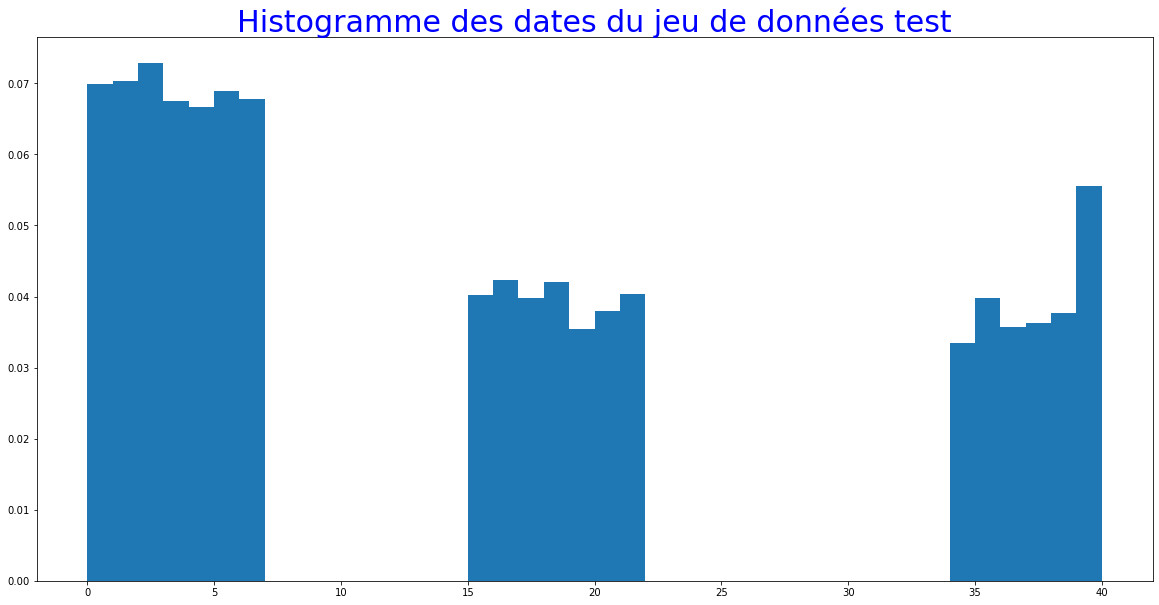

In [7]:
plt.figure(figsize=(20,10))
plt.hist(df_pred['date'] ,40, density=True)
plt.show
plt.title("Histogramme des dates du jeu de données test", fontsize = 30, color= "blue")

Le jeu de données test ne contient pas toutes le dates possibles. Il y a beaucoup de recherches pour des dates de 0 à 6 : il y en a 3215 ce qui représente près de la moitié du jeu de données test. 

- **Stock**

In [9]:
df_pred['stock'].describe()

count    6644.000000
mean       23.766105
std        32.582240
min         0.000000
25%         2.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: stock, dtype: float64

Text(0.5, 1.0, 'Histogramme des stocks du jeu de données test')

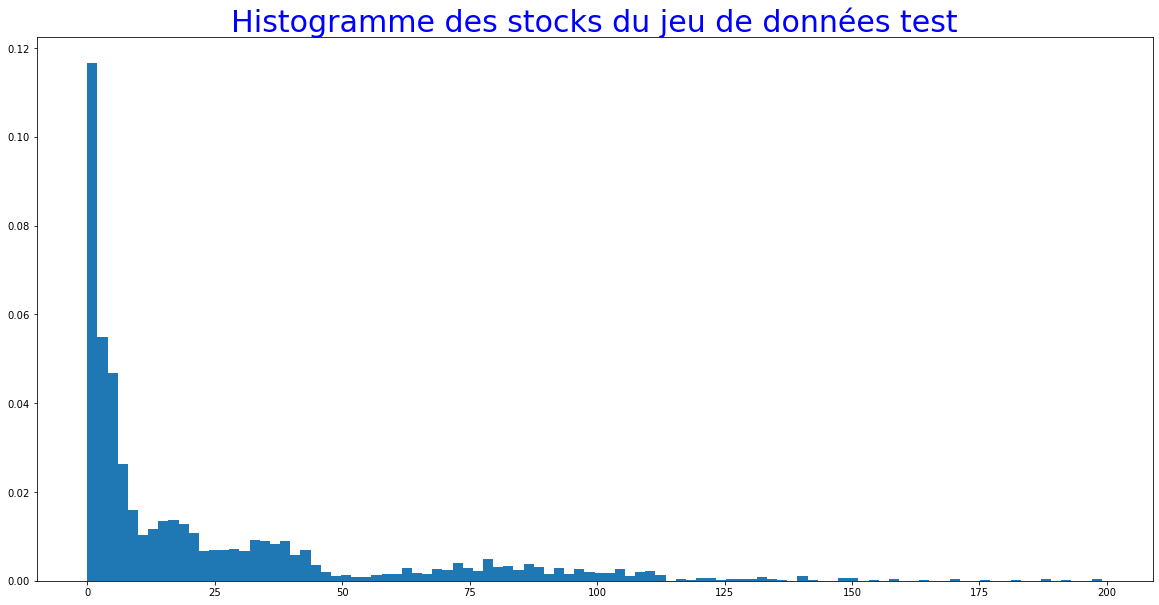

In [10]:
plt.figure(figsize=(20,10))
plt.hist(df_pred['stock'] ,100, density=True)
plt.show
plt.title("Histogramme des stocks du jeu de données test", fontsize = 30, color= "blue")

- **Langue**

In [11]:
df_pred['language'].describe()

count          6644
unique           27
top       hungarian
freq            967
Name: language, dtype: object

In [12]:
df_pred['language'].value_counts()

hungarian        967
finnish          466
austrian         461
romanian         439
slovakian        418
swedish          404
estonian         390
bulgarian        356
danish           346
irish            209
maltese          197
greek            181
slovene          174
belgian          153
spanish          141
dutch            134
polish           131
french           128
italian          128
luxembourgish    125
lithuanian       122
latvian          113
cypriot          106
czech            104
croatian         101
german            80
portuguese        70
Name: language, dtype: int64

Recherche en hongrois largement majoritaire (967). \
Très peu de recherche en protuguais (70).

- **Ville**

In [13]:
df_pred['city'].describe()

count          6644
unique            9
top       amsterdam
freq           1134
Name: city, dtype: object

In [14]:
df_pred['city'].value_counts()

amsterdam     1134
paris         1125
madrid        1094
copenhagen     723
rome           721
vilnius        609
vienna         568
sofia          374
valletta       296
Name: city, dtype: int64

Amsterdam, Paris et Madrid les villes les plus présentes dans le jeu de données test. 

- **Mobile**

In [15]:
df_pred['mobile'].value_counts()

0    3630
1    3014
Name: mobile, dtype: int64

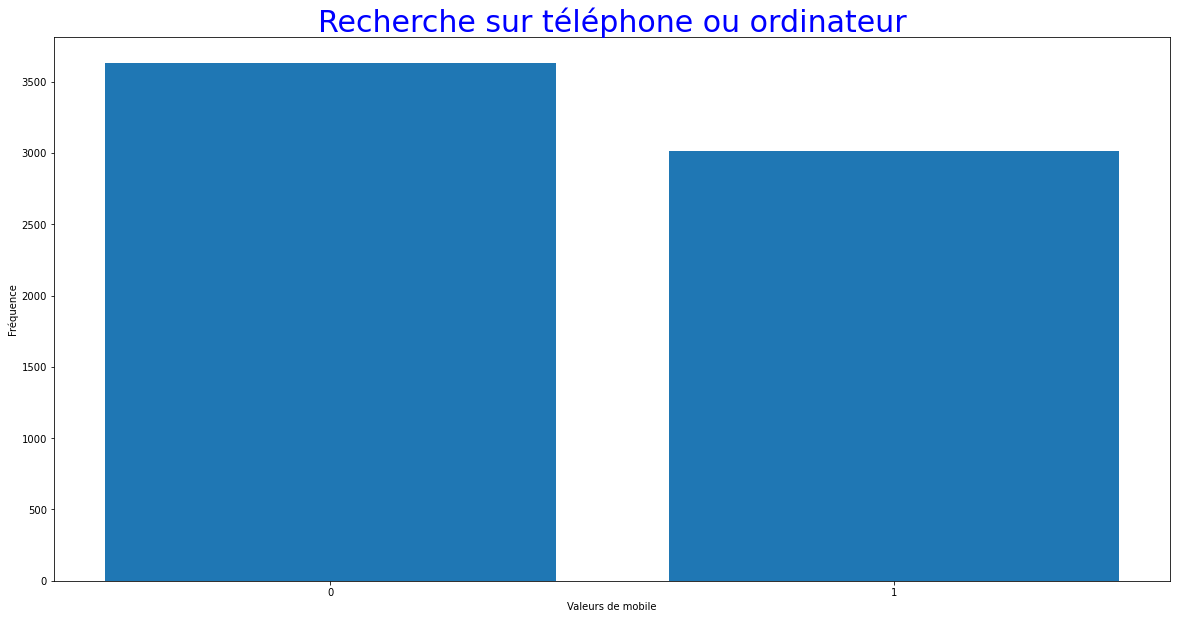

In [31]:
counts = df_pred["mobile"].value_counts()

plt.figure(figsize=(20,10))
plt.bar(counts.index, counts.values, color="#1f77b4")

plt.xticks([0, 1], ["0 (ordinateur)", "1 (téléphone)"])
plt.xlabel("Valeurs de mobile")
plt.ylabel("Fréquence")
plt.title("Recherche sur téléphone ou ordinateur", fontsize = 30, color= "blue")

plt.show()

Il y a un peu plus de recherche sur ordinateur (0) que sur téléphone (1).

- **Parking**

In [27]:
df_pred['parking'].value_counts()

1    3523
0    3121
Name: parking, dtype: int64

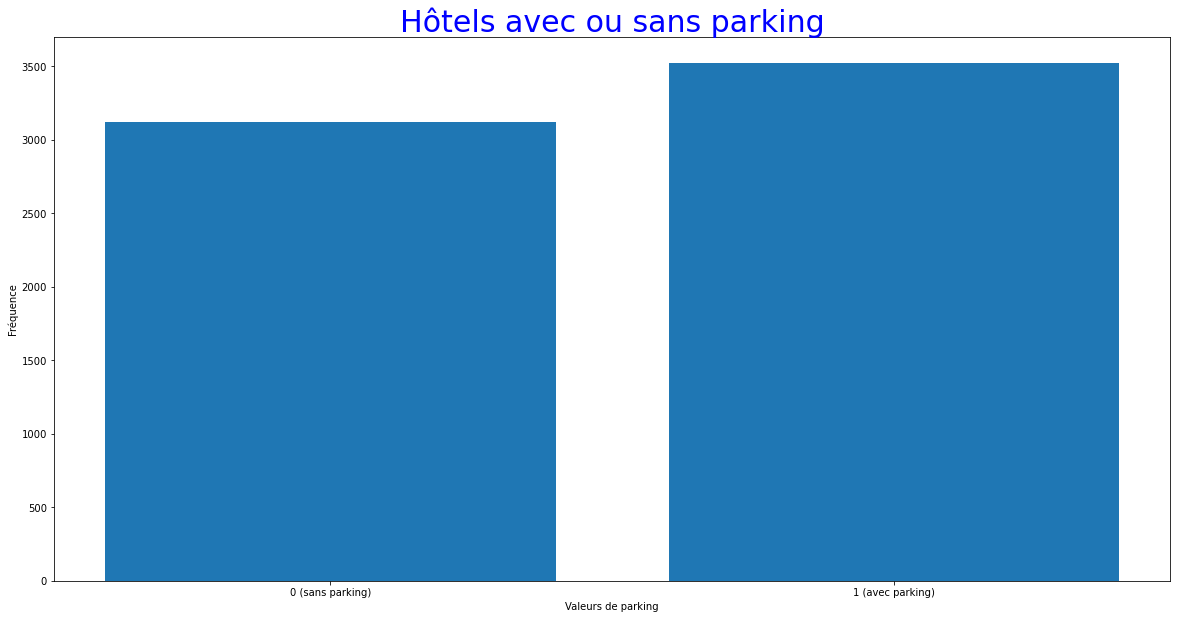

In [30]:
counts = df_pred["parking"].value_counts()

plt.figure(figsize=(20,10))
plt.bar(counts.index, counts.values, color="#1f77b4")

plt.xticks([0, 1], ["0 (sans parking)", "1 (avec parking)"])
plt.xlabel("Valeurs de parking")
plt.ylabel("Fréquence")
plt.title("Hôtels avec ou sans parking", fontsize = 30, color= "blue")

plt.show()

- **Piscine**

In [32]:
df_pred['pool'].value_counts()

0    5452
1    1192
Name: pool, dtype: int64

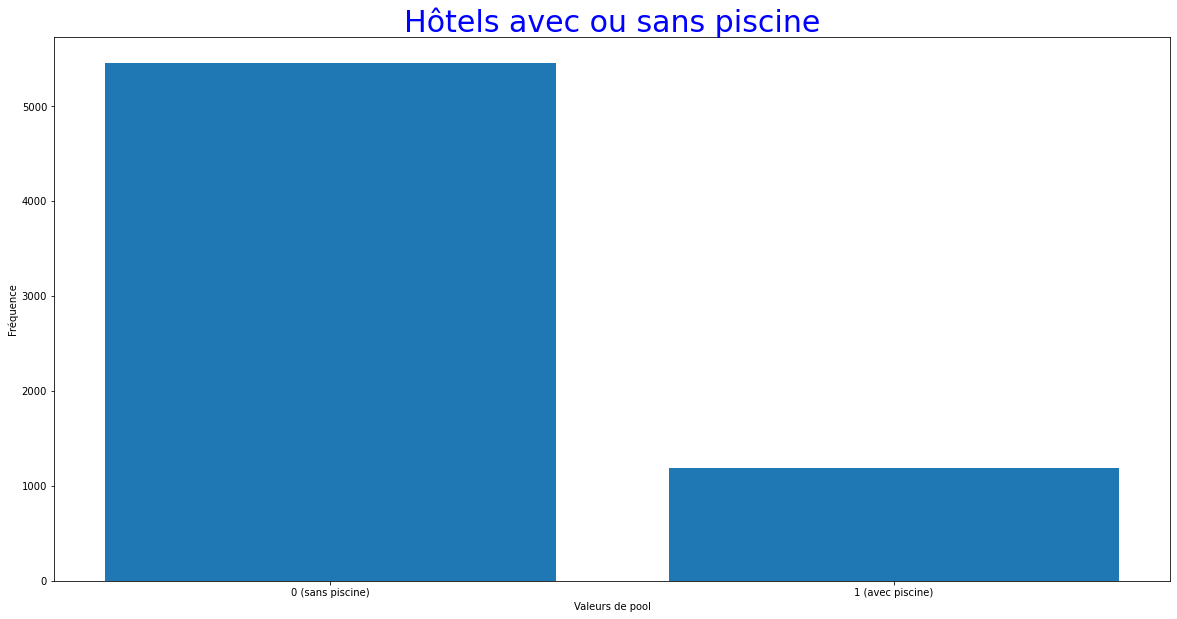

In [34]:
counts = df_pred["pool"].value_counts()

plt.figure(figsize=(20,10))
plt.bar(counts.index, counts.values, color="#1f77b4")

plt.xticks([0, 1], ["0 (sans piscine)", "1 (avec piscine)"])
plt.xlabel("Valeurs de pool")
plt.ylabel("Fréquence")
plt.title("Hôtels avec ou sans piscine", fontsize = 30, color= "blue")

plt.show()

- **Politique enfant**

In [35]:
df_pred['children_policy'].value_counts()

0    5961
1     572
2     111
Name: children_policy, dtype: int64

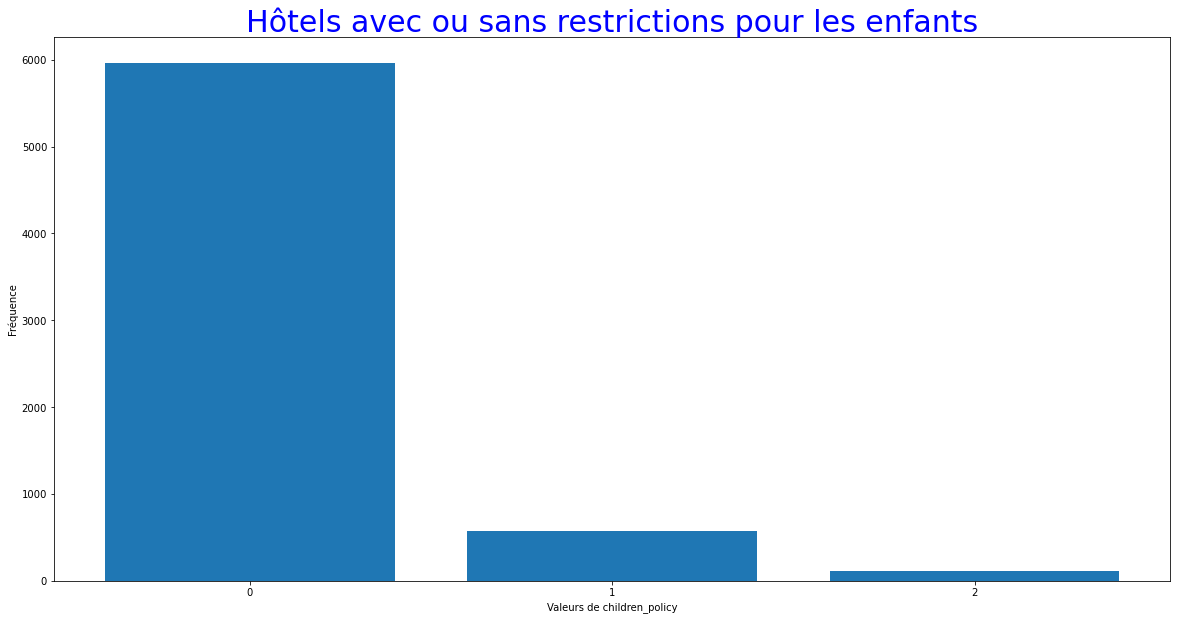

In [36]:
counts = df_pred["children_policy"].value_counts()

plt.figure(figsize=(20,10))
plt.bar(counts.index, counts.values, color="#1f77b4")

plt.xticks([0, 1,2], ["0", "1", "2"])
plt.xlabel("Valeurs de children_policy")
plt.ylabel("Fréquence")
plt.title("Hôtels avec ou sans restrictions pour les enfants", fontsize = 30, color= "blue")

plt.show()

### Matrice de corrélation

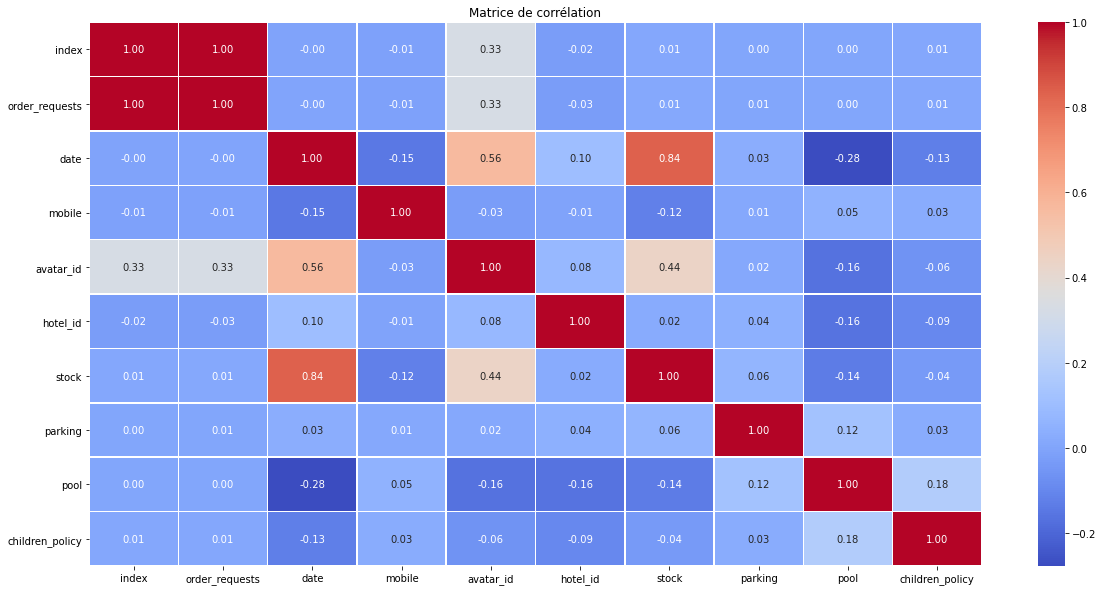

In [38]:
corr = df_pred.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

## B- Statistiques descriptives sur les données extraites

In [ ]:
df_train.info()

Text(0.5, 1.0, 'Histogramme du prix')

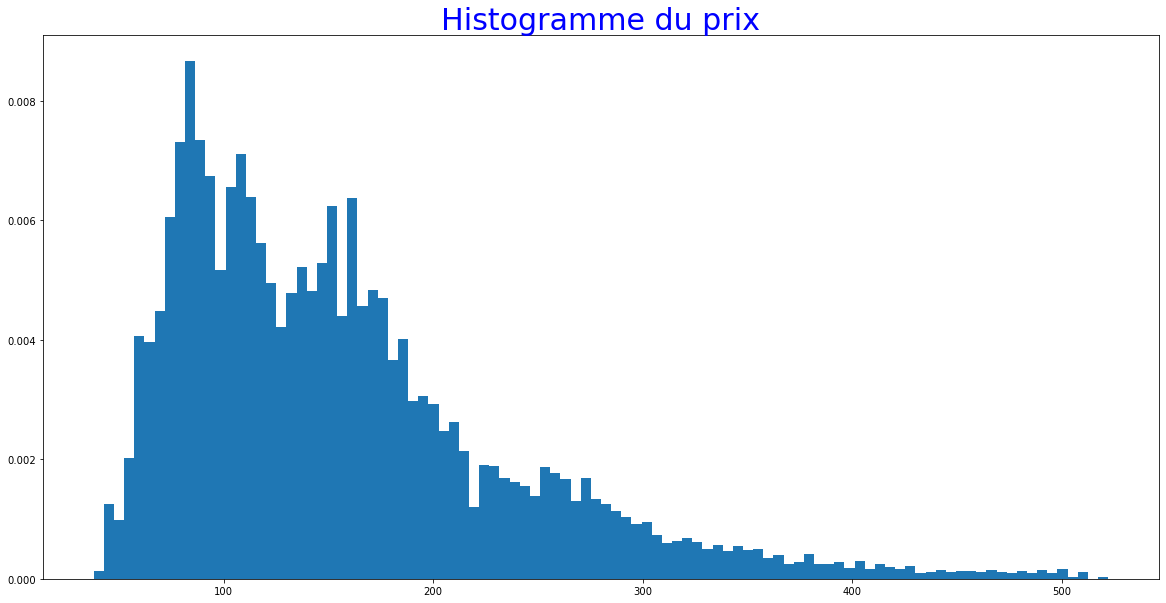

In [39]:
plt.figure(figsize=(20,10))
plt.hist(df_train['price'],100, density=True)
plt.show
plt.title("Histogramme du prix", fontsize = 30, color= "blue")

### La variable prix (boxplots)

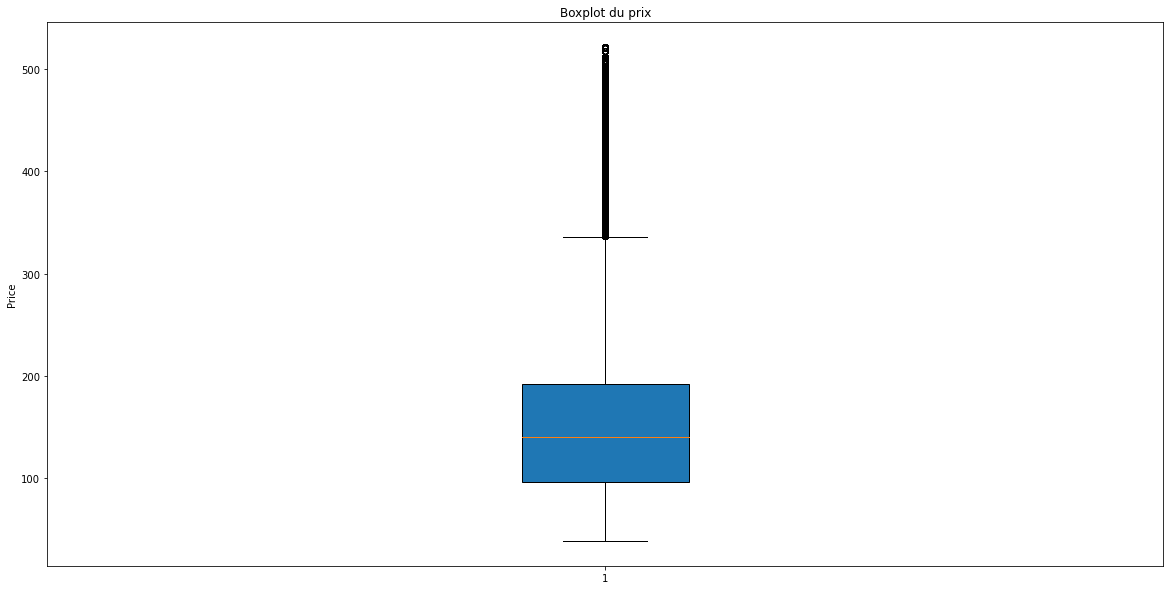

In [40]:
plt.figure(figsize=(20,10))
plt.boxplot(df_train["price"], vert=True, patch_artist=True, boxprops=dict(facecolor="#1f77b4"))

plt.ylabel("Price", fontsize = 15)
plt.title("Boxplot du prix", fontsize = 30, color= "blue")

plt.show()

#### Avec date :

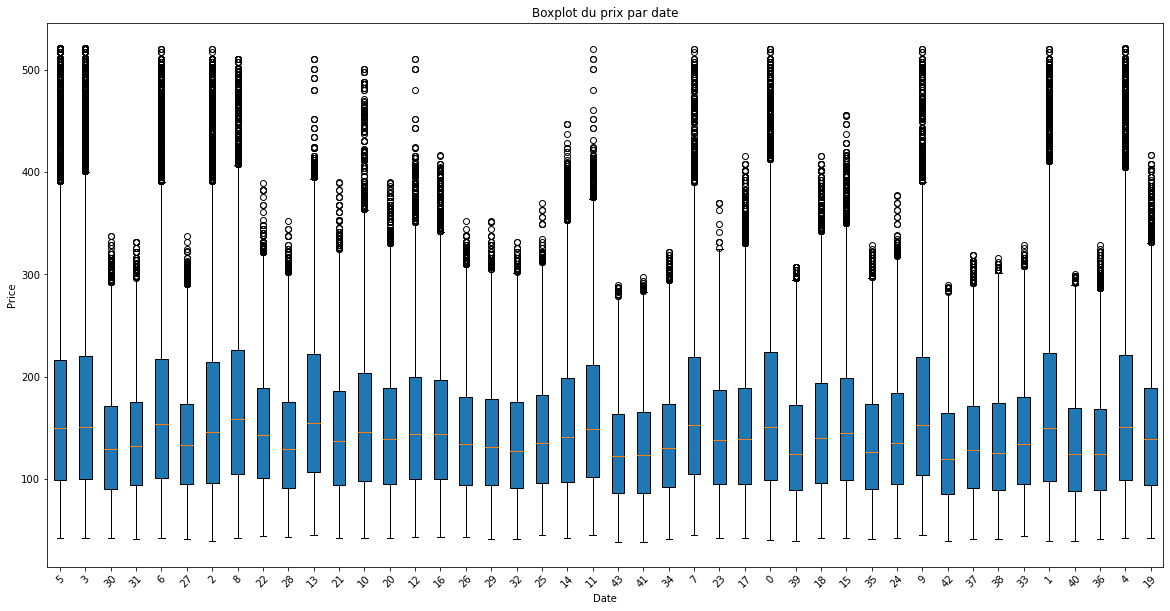

In [41]:
plt.figure(figsize=(20,10))
plt.boxplot([df_train[df_train["date"] == d]["price"] for d in df_train["date"].unique()],
            labels=df_train["date"].unique(), patch_artist=True, boxprops=dict(facecolor="#1f77b4"))

plt.xlabel("Date", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Boxplot du prix par date", fontsize = 30, color= "blue")

plt.xticks(rotation=45)

plt.show()

#### Avec city :

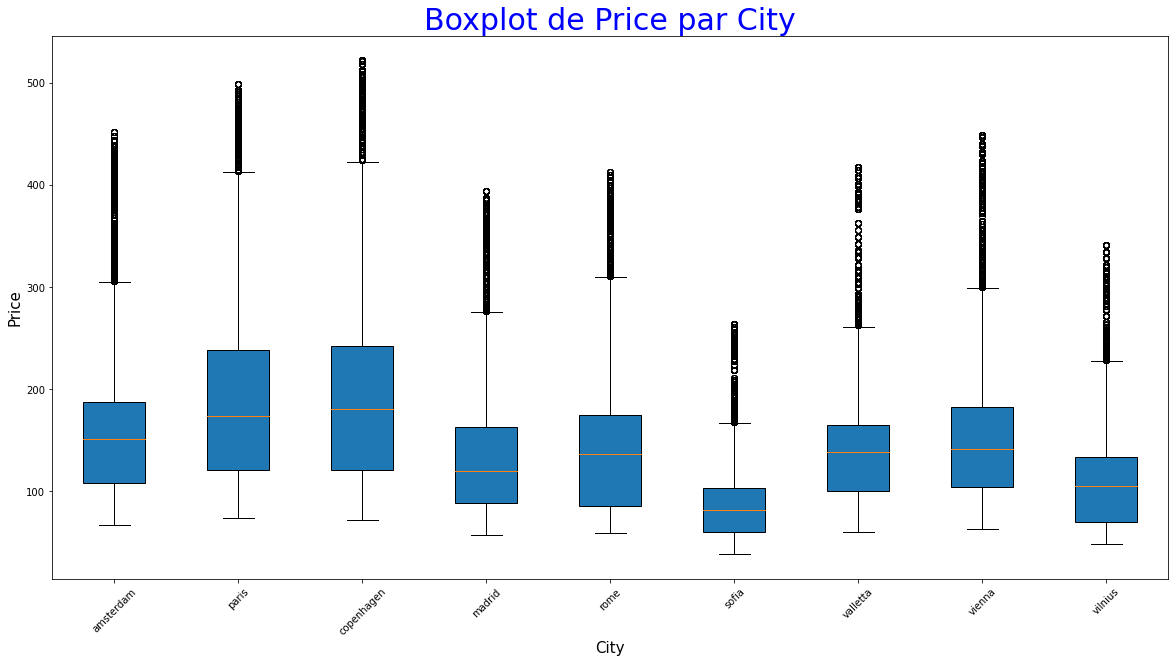

In [43]:
cities = df_train["city"].unique()
price_data = [df_train[df_train["city"] == city]["price"] for city in cities]

plt.figure(figsize=(20,10))
plt.boxplot(price_data, labels=cities, patch_artist=True, boxprops=dict(facecolor="#1f77b4"))

plt.xlabel("City", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Boxplot de Price par City", fontsize = 30, color= "blue")

plt.xticks(rotation=45)

plt.show()

In [45]:
# calcul de la moyenne des prix pour chaque ville
city_price = df_train.groupby('city')['price'].mean().reset_index()

# initialisation de geolocator
geolocator = Nominatim(user_agent="myGeocoder", timeout=10)

# création de la carte de l'Europe
europe_map = folium.Map(location=[54.5260, 15.2551], zoom_start=4)

# Ajout des coordonnées GPS de Sofia car sinon Sofia est localisé à Madagascar
sofia_lat = 42.6977
sofia_lon = 23.3219

#calcul du ratio pour varier la taille des bulles
max_price = df_train['price'].max()
min_price = df_train['price'].min()

# boucle pour créer les bulles
for i in range(0, len(city_price)):
    if city_price.iloc[i]['city'] == "sofia":
        folium.Circle(
            location=[sofia_lat, sofia_lon],
            popup=city_price.iloc[i]['city'],
            radius=(city_price.iloc[i]['price']-min_price)/(max_price-min_price)*10**6,
            color='crimson',
            fill=True,
            fill_color='crimson'
        ).add_to(europe_map)
    else:
        location = geolocator.geocode(city_price.iloc[i]['city'])
        folium.Circle(
            location=[location.latitude, location.longitude],
            popup=city_price.iloc[i]['city'],
            radius=(city_price.iloc[i]['price']-min_price)/(max_price-min_price)*10**6, 
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(europe_map)

europe_map

#### Avec language :

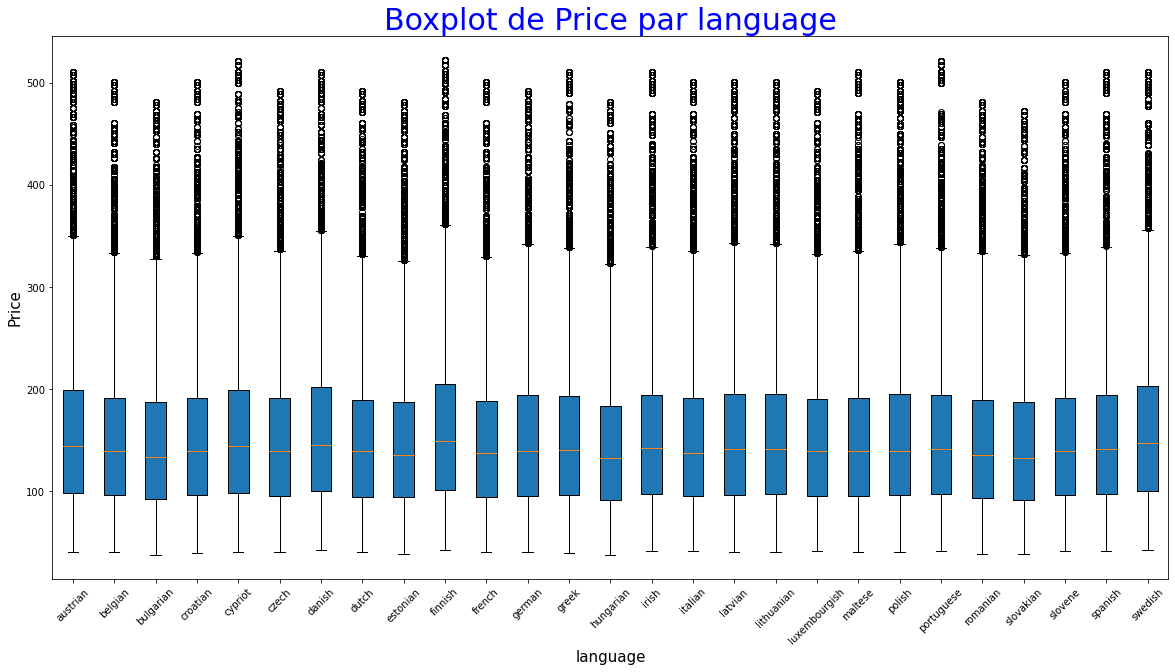

In [53]:
languages = df_train["language"].unique()
price_data = [df_train[df_train["language"] == language]["price"] for language in languages]

plt.figure(figsize=(20,10))
plt.boxplot(price_data, labels=languages, patch_artist=True, boxprops=dict(facecolor="#1f77b4"))

plt.xlabel("language", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Boxplot de Price par language", fontsize = 30, color= "blue")

plt.xticks(rotation=45)

plt.show()

#### Avec mobile :

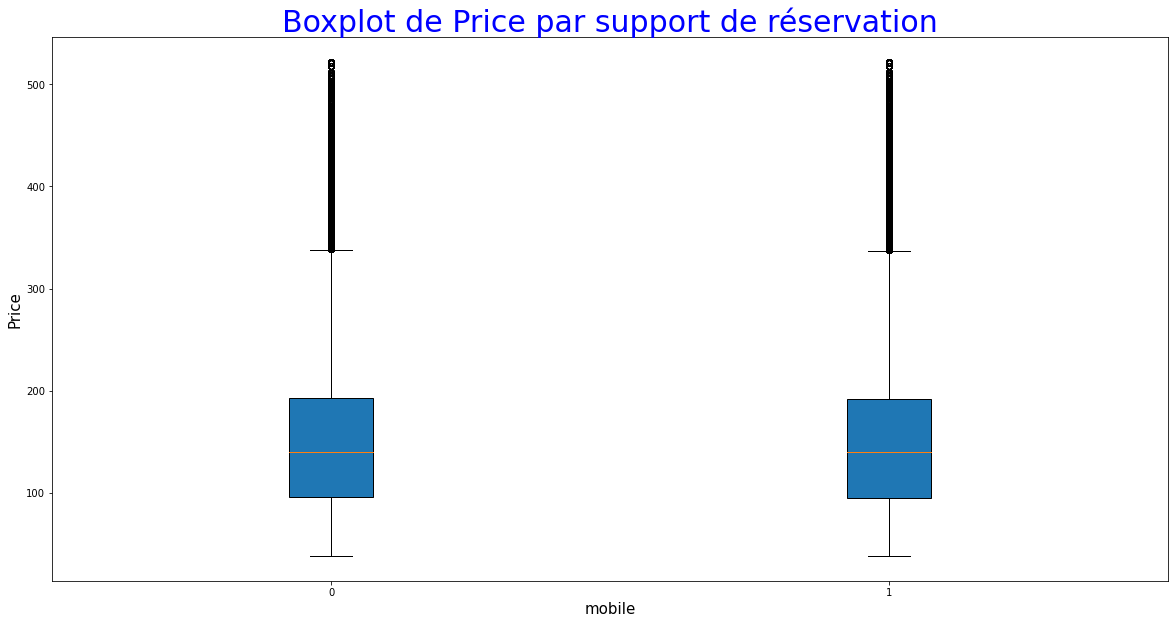

In [52]:
mobile = df_train["mobile"].unique()
price_data = [df_train[df_train["mobile"] == mob]["price"] for mob in mobile]

plt.figure(figsize=(20,10))
plt.boxplot(price_data, labels=mobile, patch_artist=True, boxprops=dict(facecolor="#1f77b4"))

plt.xlabel("mobile", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Boxplot de Price par support de réservation", fontsize = 30, color= "blue")

plt.show()

#### Avec parking :

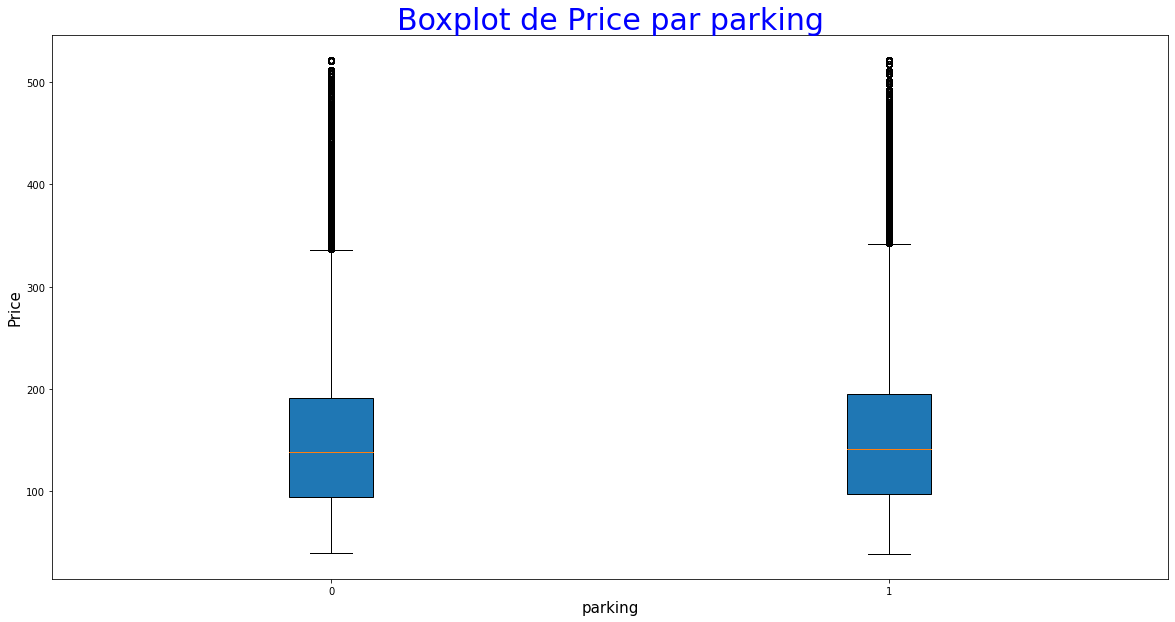

In [55]:
parking = df_train["parking"].unique()
price_data = [df_train[df_train["parking"] == park]["price"] for park in parking]

plt.figure(figsize=(20,10))
plt.boxplot(price_data, labels=parking, patch_artist=True, boxprops=dict(facecolor="#1f77b4"))

plt.xlabel("parking", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Boxplot de Price par parking", fontsize = 30, color= "blue")

plt.show()

#### Avec pool :

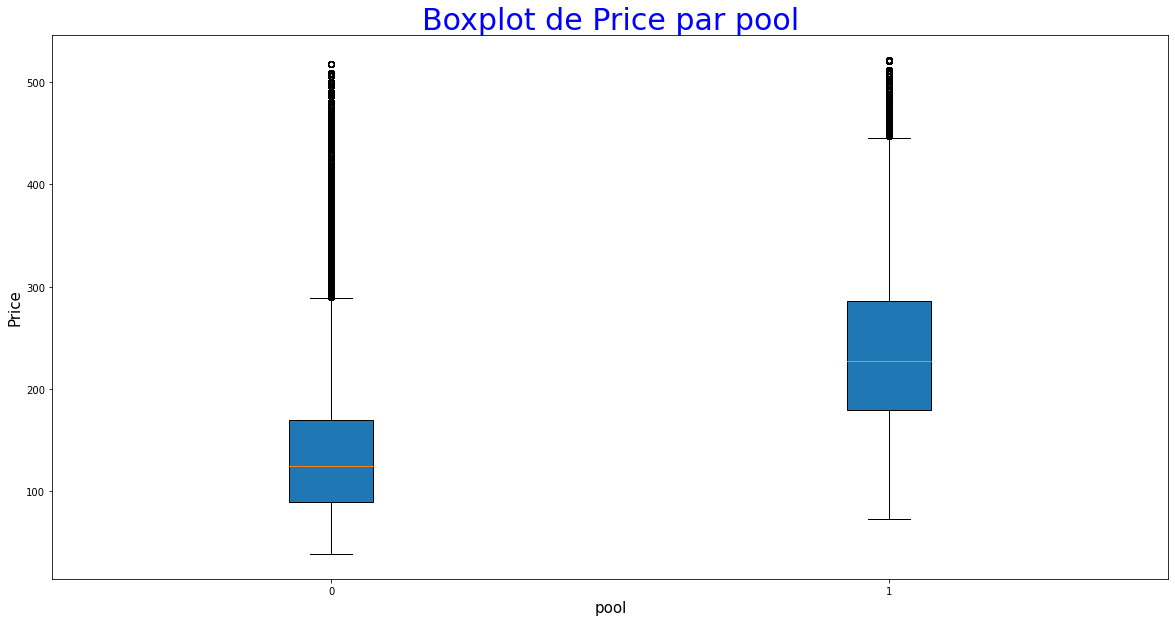

In [56]:
pools = df_train["pool"].unique()
price_data = [df_train[df_train["pool"] == pool]["price"] for pool in pools]

plt.figure(figsize=(20,10))
plt.boxplot(price_data, labels=pools, patch_artist=True, boxprops=dict(facecolor="#1f77b4"))

plt.xlabel("pool", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Boxplot de Price par pool", fontsize = 30, color= "blue")

plt.show()

#### Avec children_policy :

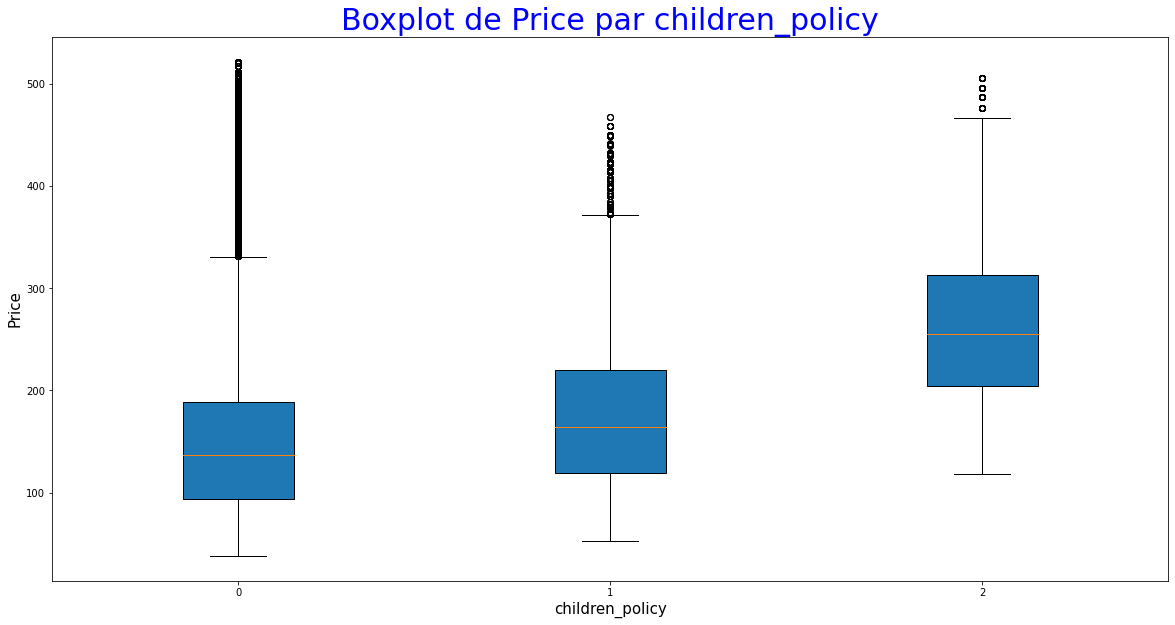

In [57]:
children = df_train["children_policy"].unique()
price_data = [df_train[df_train["children_policy"] == child]["price"] for child in children]

plt.figure(figsize=(20,10))
plt.boxplot(price_data, labels=children, patch_artist=True, boxprops=dict(facecolor="#1f77b4"))

plt.xlabel("children_policy", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Boxplot de Price par children_policy", fontsize = 30, color= "blue")

plt.show()

### Autres variables :

- **Mobile**

In [58]:
df_train['mobile'].value_counts()

0    306149
1    306038
Name: mobile, dtype: int64

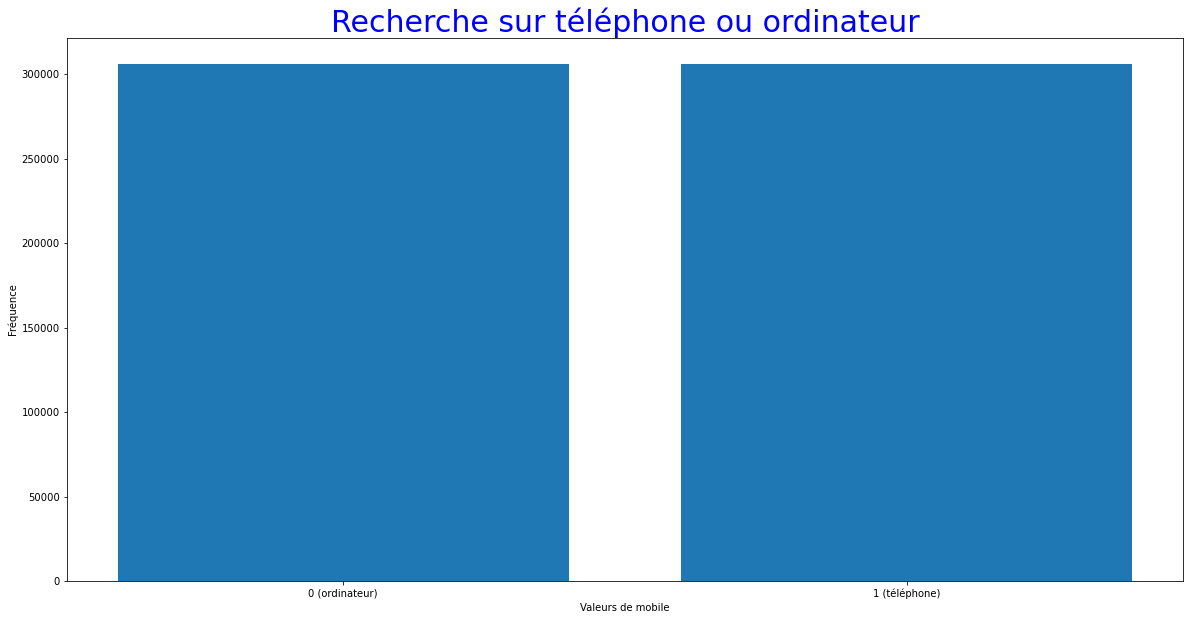

In [59]:
counts = df_train["mobile"].value_counts()

plt.figure(figsize=(20,10))
plt.bar(counts.index, counts.values, color="#1f77b4")

plt.xticks([0, 1], ["0 (ordinateur)", "1 (téléphone)"])
plt.xlabel("Valeurs de mobile")
plt.ylabel("Fréquence")
plt.title("Recherche sur téléphone ou ordinateur", fontsize = 30, color= "blue")

plt.show()

- **Piscine**

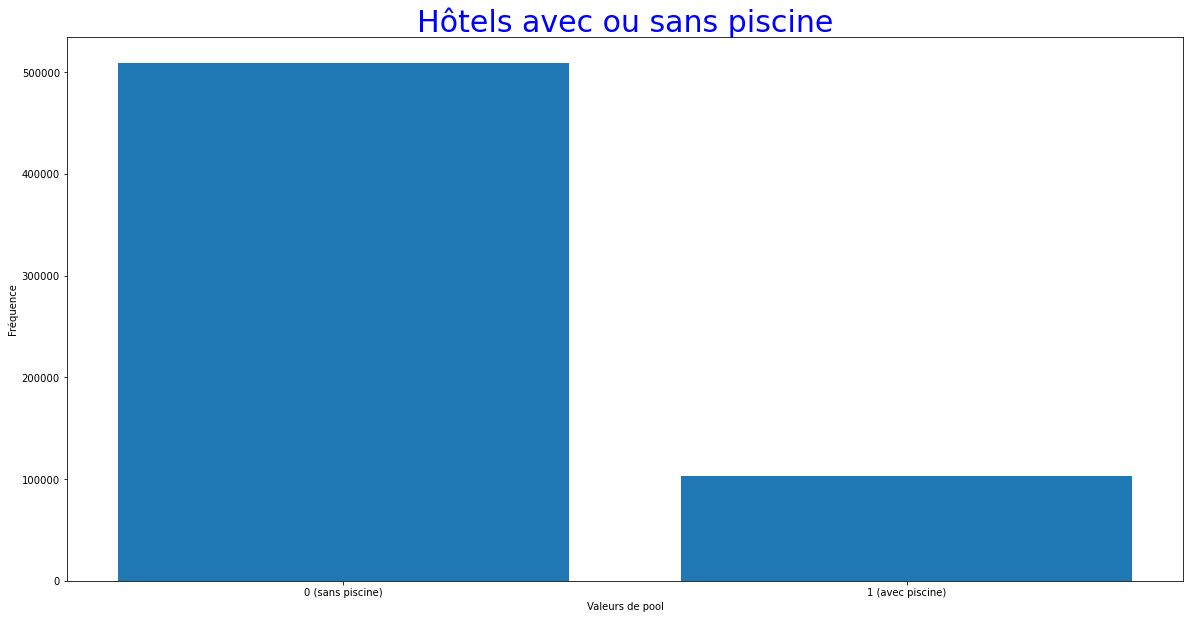

In [60]:
counts = df_train["pool"].value_counts()

plt.figure(figsize=(20,10))
plt.bar(counts.index, counts.values, color="#1f77b4")

plt.xticks([0, 1], ["0 (sans piscine)", "1 (avec piscine)"])
plt.xlabel("Valeurs de pool")
plt.ylabel("Fréquence")
plt.title("Hôtels avec ou sans piscine", fontsize = 30, color= "blue")

plt.show()

- **Parking**

In [61]:
df_train['parking'].value_counts()

0    344585
1    267602
Name: parking, dtype: int64

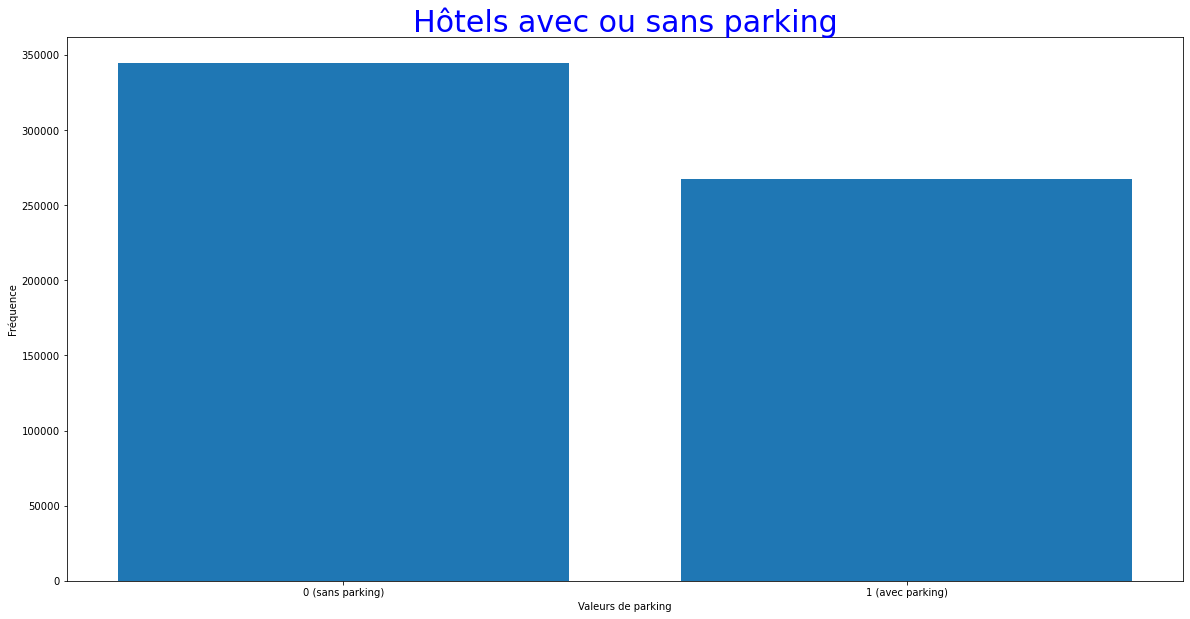

In [62]:
counts = df_train["parking"].value_counts()

plt.figure(figsize=(20,10))
plt.bar(counts.index, counts.values, color="#1f77b4")

plt.xticks([0, 1], ["0 (sans parking)", "1 (avec parking)"])
plt.xlabel("Valeurs de parking")
plt.ylabel("Fréquence")
plt.title("Hôtels avec ou sans parking", fontsize = 30, color= "blue")

plt.show()

- **Politique enfant**

In [63]:
df_train['children_policy'].value_counts()

0    582186
1     20860
2      9141
Name: children_policy, dtype: int64

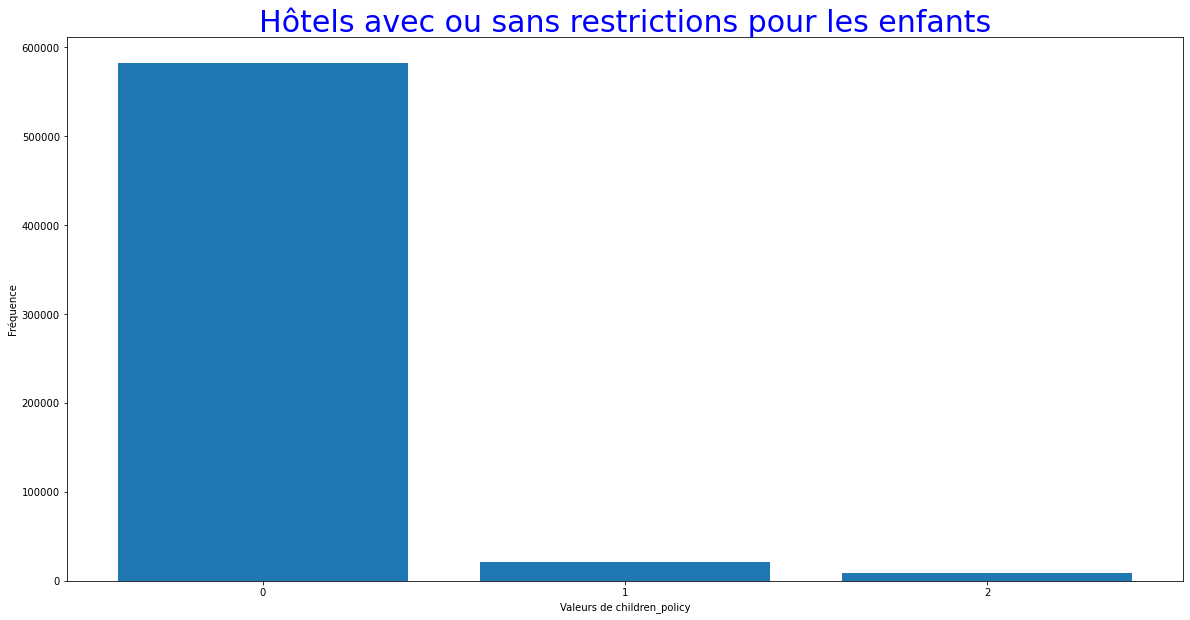

In [64]:
counts = df_train["children_policy"].value_counts()

plt.figure(figsize=(20,10))
plt.bar(counts.index, counts.values, color="#1f77b4")

plt.xticks([0, 1,2], ["0", "1", "2"])
plt.xlabel("Valeurs de children_policy")
plt.ylabel("Fréquence")
plt.title("Politique enfant des hotels", fontsize = 30, color= "blue")

plt.show()

### Matrice de corrélation

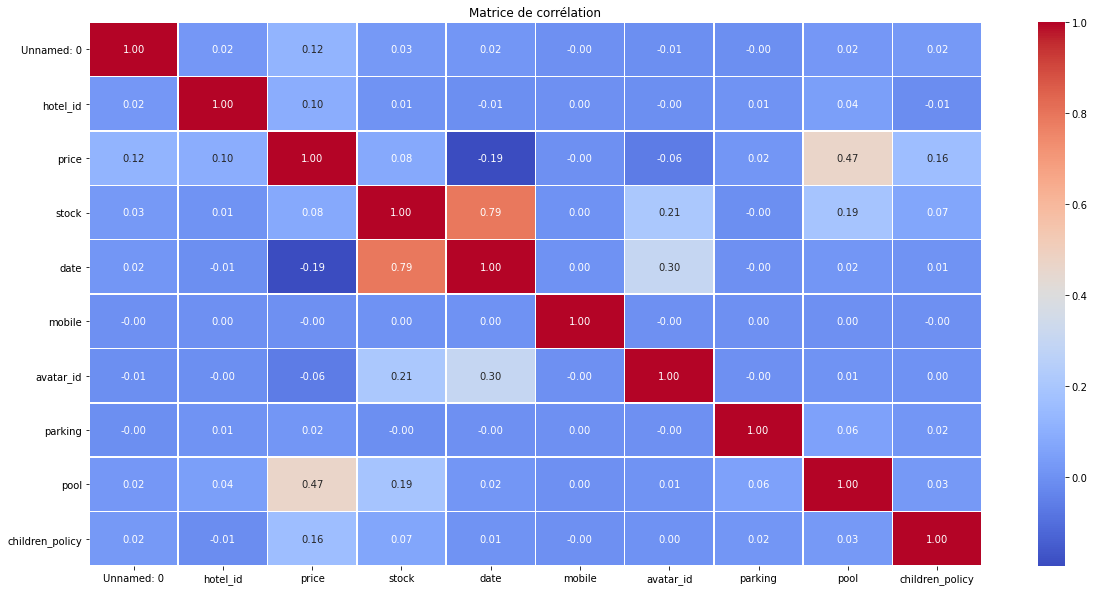

In [65]:
corr = df_train.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()